In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## The game of life (Advanced)

This is an example of a __cellular automaton__ - a collection of rules that act on the state of a system and determine the updated state. These often have interesting, _emergent_ behaviours that are not obviously inherent in the rules.

There is a similarity with Molecular Dynamics, Discrete Element Modeling, Agent-Based modeling and so on where simple rules acting locally produce bulk properties of the system. 

The game of life is simple enough in rules but can produce interesting emergent behaviour. It is a good template to explore some of the issues we always face in building models.

Let's look a building a more challenging version of the problem - larger, faster, better analysis.

In [2]:
# The rules of the game

size     = 100
lonely   = 2
crowded  = 4
breeding = 3

We don't want to keep setting this thing up by hand. Here is a way to make an array of zeros and ones at random

In [3]:
state = np.round(np.random.random_sample((size,size) )).astype(int)

print state
print 
print np.count_nonzero(state)
print

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(state)? (<ipython-input-3-745c9426955c>, line 3)

In [4]:
plt.imshow(state, interpolation='nearest', cmap="gray") 

NameError: name 'state' is not defined

In [5]:
def live_neighbours(state):
    ln = np.empty_like(state)
    for index, value in np.ndenumerate(state):
        #Need to add 2, becase the slicing works like 'up to but not including'
        x0 = max(0,(index[0]-1))
        x1 = max(0,(index[0]+2))
        y0 = max(0,(index[1]-1))
        y1 = max(0,(index[1]+2))
        subarray = state[x0:x1, y0:y1]
        ln[index] = subarray.sum() - value # need to subtract actual value at that cell...
        
    return ln

In [6]:
ln = live_neighbours(state)

print ln

plt.imshow(ln, interpolation='nearest', cmap="jet") 
plt.colorbar()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(ln)? (<ipython-input-6-44352a3fa981>, line 3)

Let's use numpy to locate *quickly* the regions where the death conditions apply 

```python
death1 = np.where(ln >= crowded)
```

Note the form that this returns - the coordinates where the condition applies

In [7]:
death1 = np.where(ln >= crowded)
death2 = np.where(ln <  lonely)

print death1

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(death1)? (<ipython-input-7-9de97f7c7f29>, line 4)

In [8]:
dying_cells = np.zeros_like(state)
dying_cells[death1] = 1
dying_cells[death2] = 1

## 

plt.imshow(dying_cells, interpolation='nearest', cmap="gray_r") 
plt.colorbar()

NameError: name 'state' is not defined

In [9]:
birth = np.where(ln == breeding)

baby_cells = np.zeros_like(state)
baby_cells[birth] = 1

plt.imshow(baby_cells, interpolation='nearest', cmap="gray_r") 
plt.colorbar()

NameError: name 'ln' is not defined

In [10]:
## These should be complementary

check = dying_cells + baby_cells
print check.max()

SyntaxError: invalid syntax (<ipython-input-10-d972af50b688>, line 4)

In [11]:
# Logical operations on the entire array to update state

new_state = state.copy()
new_state[death1]   = 0
new_state[death2]   = 0
new_state[birth]  = 1

plt.imshow(new_state, interpolation='nearest', cmap="gray_r",) 
plt.colorbar()
plt.savefig("Frame-1.png", dpi=300, format="png" )

NameError: name 'state' is not defined

In [12]:
## Bundle this up to make a sequence of images

state_list = [state.copy()]

for i in range(0, 250):
    
    if i%50 == 0:
        print i

    ln = live_neighbours(state)

    state[ln >= crowded]   = 0
    state[ln <  lonely]    = 0
    state[ln == breeding]  = 1

    state_list.append(state.copy())
    

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(i)? (<ipython-input-12-036597bdef14>, line 8)

In [13]:
state_list

NameError: name 'state_list' is not defined

### Exercise


__Class Exercise:__ Now let's try to make a series of frames as images for a number of frames of the game of life. We could also try changing the parameters of the game to see what patterns develop. 

  - What resolution can we reach ? 
  - Can we work out ways to make this run faster ?
  - What if there is more than one happy state where new cells grow ?

In [14]:
def update_state(state):
    new_state = state.copy()

    ln = live_neighbours(state)
    
    death1 = np.where(ln >= crowded)
    death2 = np.where(ln <  lonely)
    birth  = np.where(ln == breeding)

    new_state[death1]   = 0
    new_state[death2]   = 0
    new_state[birth]    = 1
    
    return new_state
    

In [15]:
# Initialise

state = np.round(np.random.random_sample((size,size) )).astype(int)
steps = 100

# Loops and save image

for step in range(0, steps):
    
    new_state = update_state(state)
    print "Step {} - living cells - {}".format(step, np.count_nonzero(new_state))
    
    plt.imshow(new_state, interpolation='nearest', cmap="gray_r",) 
    plt.savefig("Frame-{:04d}.png".format(step), dpi=300, format="png" )
    
    # We could keep all of these for later or discard
    state = new_state

SyntaxError: invalid syntax (<ipython-input-15-afe02736947f>, line 11)

### Speedup

What is taking the time in this computation ?

  - Boundaries always reset to zero, do away with submatrix tests ?
  - Fastest way to reset boundaries ?
  - Logic tests or multiply or add / cap the max

## Animation

NameError: name 'state_list' is not defined

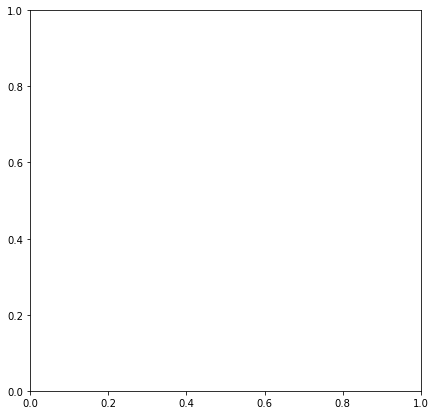

In [16]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
fig.set_size_inches((7,7))
animage = ax.imshow(state_list[0], interpolation='bilinear', cmap=plt.cm.bone)

In [17]:
def init():
    animage.set_data(state_list[0])
    return (animage,)

def animate(i):
    animage.set_data(state_list[i])
    return (animage,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(state_list), interval=50, 
                               blit=True)

NameError: name 'state_list' is not defined

In [18]:
HTML(anim.to_jshtml())

NameError: name 'anim' is not defined